# CIFAR-10 Classification
> I chose to use Greedy Algorithm over GridSearchCV algorithm for CIFAR-10 Image Classification. GridSearchCV might result in better performance but I believe it does not take much advantage of using GPU, and the time cost is higher than the advantage of convenience and accuracy. Therefore, I chose Greedy Algorithm for parameter settings. Given the range of values for a parameter, value that results in the best performance is chosen. The next parameter is chosen, assuming the value of the previously decided parameter as default. This process is done with 6 parameters, containing hyper-parameters.

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout, BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import Data & Check first 15 Pictures

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


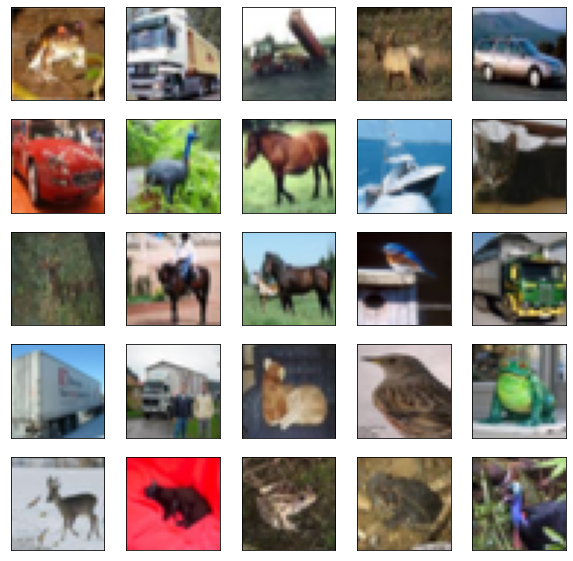

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
plt.show()

In [4]:
X_train = X_train.reshape((50000, 32, 32, 3,1))
X_test = X_test.reshape((10000, 32, 32, 3,1))
X_train , X_test = X_train/255, X_test/255

# Training Models

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=10,batch_size=100, validation_data=(X_test,y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

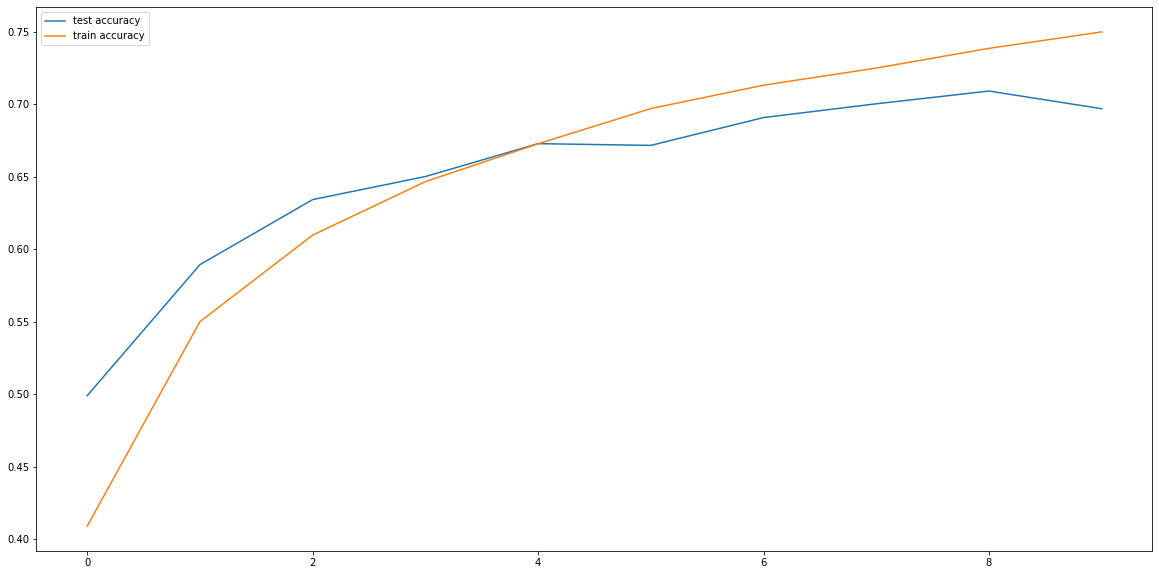

In [ ]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.plot(hist.history['val_accuracy'],label = 'test accuracy')
plt.plot(hist.history['accuracy'],label = 'train accuracy')
plt.legend()
plt.show()

## Dropout Dependencies

In [ ]:
dropouts = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
test_acc=[]
for dropout in dropouts:
    print('Dropout : ',(dropout))
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2)))


    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.summary()

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    hist = model.fit(X_train, y_train, epochs=10,batch_size=100)
    loss,accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_acc.append(accuracy)

Dropout :  0.1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                   

No handles with labels found to put in legend.


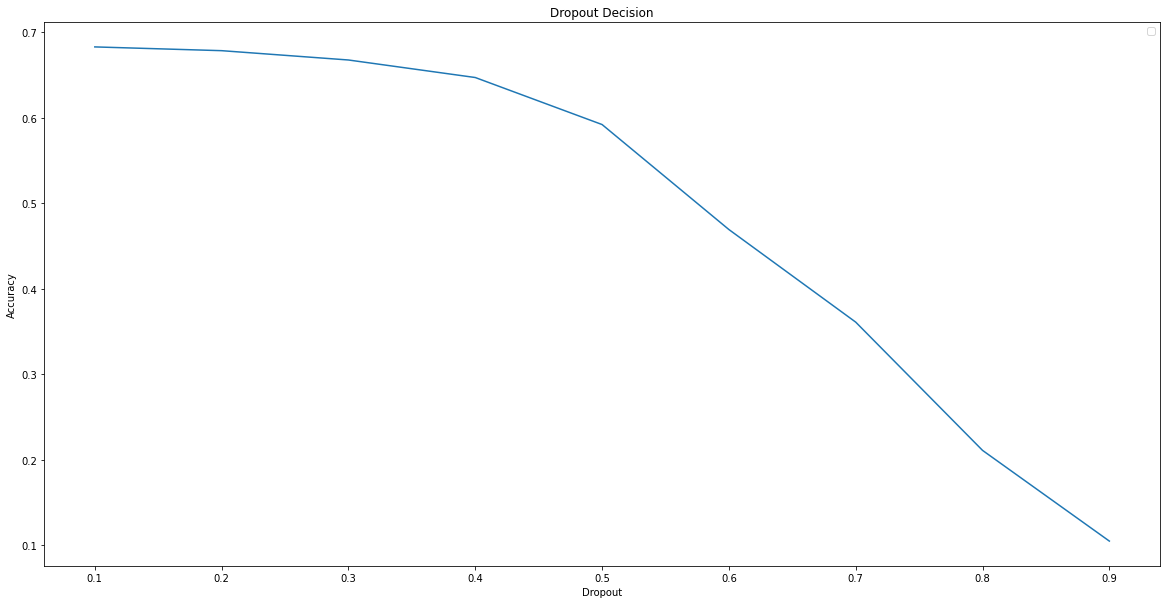

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dropouts, test_acc)
plt.xlabel('Dropout')
plt.ylabel('Accuracy')
plt.title('Dropout Decision')
plt.legend()
plt.show()

Therefore, drop out is set to 0.1 further on.

## Batch Size Dependencies

In [ ]:
batch_sizes = [50,100,200,500,1000]
dropout = 0.1
test_acc=[]
for batch_size in batch_sizes:
    print('batch_size : ',(batch_size))
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2)))


    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.summary()

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    hist = model.fit(X_train, y_train, epochs=10,batch_size=batch_size)
    score, accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_acc.append(accuracy)

batch_size :  50
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 dropout_27 (Dropout)        (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 dropout_28 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                               

No handles with labels found to put in legend.


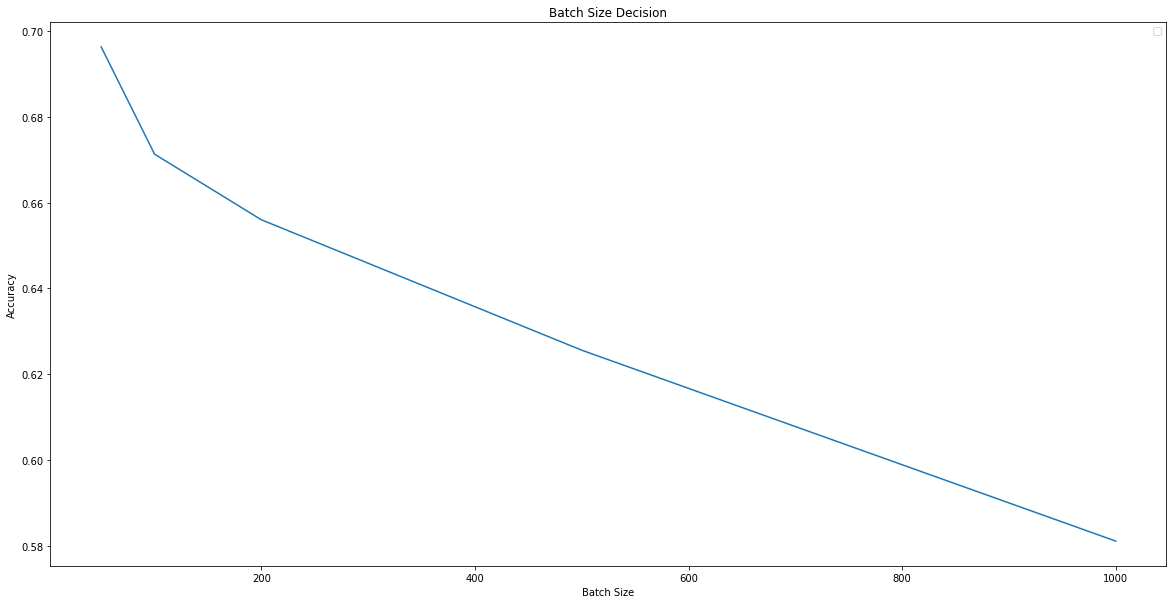

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(batch_sizes, test_acc)
plt.xlabel('Batch Size')
plt.ylabel('Accuracy')
plt.title('Batch Size Decision')
plt.legend()
plt.show()

Therefore, batch size is set to 50 further on.

## Kerner Initializer

In [ ]:
initializers = [tf.keras.initializers.Constant(3.),#Constant
                tf.keras.initializers.VarianceScaling(scale=1.0, mode="fan_in", distribution="truncated_normal", seed=None),#VarianceScaling
                tf.keras.initializers.VarianceScaling(scale=0.1, mode='fan_in', distribution='uniform'),#VarianceScaling
                tf.keras.initializers.GlorotNormal(),#GlorotNormal
                tf.keras.initializers.GlorotUniform(),#GlorotUniform
                tf.keras.initializers.HeNormal(),#HeNormal
                tf.keras.initializers.HeUniform()]#HeUniform
batch_size = 50
dropout = 0.1
test_acc=[]
for initializer in initializers:
    print('initializer : ',(initializer))
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2)))


    model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu',kernel_initializer = initializer))
    model.add(layers.Dense(10, activation='softmax'))

    # model.summary()

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    hist = model.fit(X_train, y_train, epochs=10,batch_size=batch_size)
    score, accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_acc.append(accuracy)

initializer :  <keras.initializers.initializers_v2.Constant object at 0x7f7692e60090>
Epoch 1/10
1000/1000 [==============================] - 5s 4ms/step - loss: 5329414656.0000 - accuracy: 0.1003
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1637089664.0000 - accuracy: 0.1090
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1062240960.0000 - accuracy: 0.1081
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 681272256.0000 - accuracy: 0.1108
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 371774464.0000 - accuracy: 0.1126
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 196611840.0000 - accuracy: 0.1137
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 97402552.0000 - accuracy: 0.1139
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 45204992.0000 - accuracy: 0.1143
Epoch 9/10
1000/1000 [===========

No handles with labels found to put in legend.


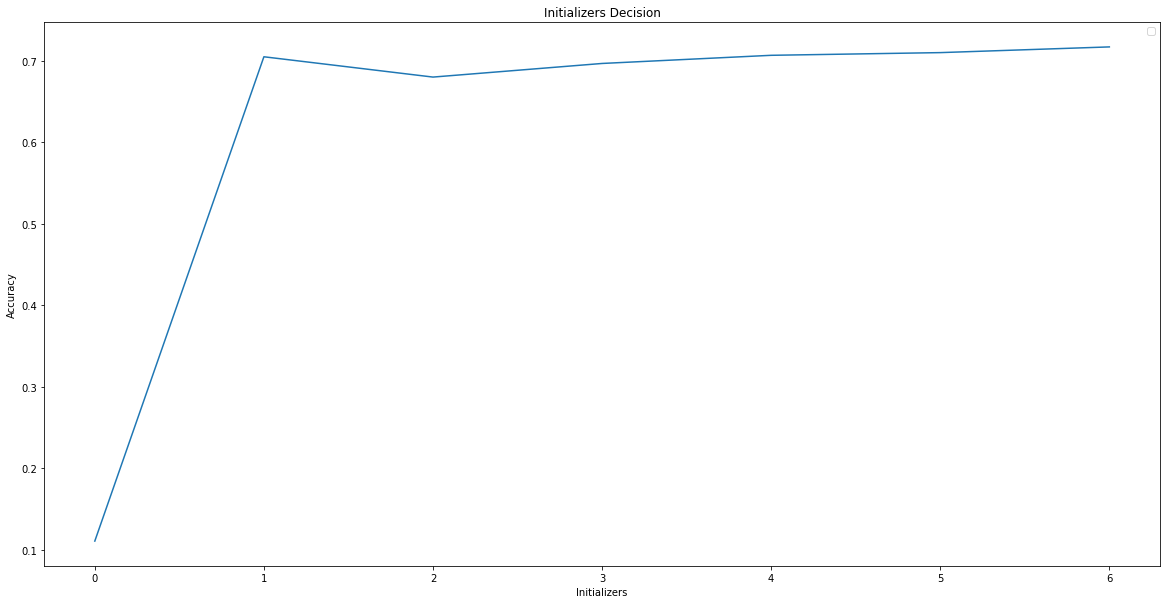

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test_acc)
plt.xlabel('Initializers')
plt.ylabel('Accuracy')
plt.title('Initializers Decision')
plt.legend()
plt.show()

Therefore, "tf.keras.initializers.HeUniform()" kernel initializer is used further on

## Padding

In [ ]:
paddings = ['valid','same']
initializer = tf.keras.initializers.HeUniform()
batch_size = 50
dropout = 0.1
test_acc=[]
for padding in paddings:
    print('padding : ',padding)
    model = models.Sequential()

    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2),padding = padding))


    model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2),padding = padding))

    model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2),padding = padding))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu',kernel_initializer = initializer))
    model.add(layers.Dense(10, activation='softmax'))

    # model.summary()

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    hist = model.fit(X_train, y_train, epochs=10,batch_size=batch_size)
    score, accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_acc.append(accuracy)

padding :  valid
Epoch 1/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5812 - accuracy: 0.4231
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.2108 - accuracy: 0.5690
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0733 - accuracy: 0.6216
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9820 - accuracy: 0.6566
Epoch 5/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.9151 - accuracy: 0.6805
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8608 - accuracy: 0.6995
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.8128 - accuracy: 0.7142
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7805 - accuracy: 0.7258
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7455 - accuracy: 0.7392
Epoch 10/10
1000/1000 [==============================] - 4s 4ms/s

No handles with labels found to put in legend.


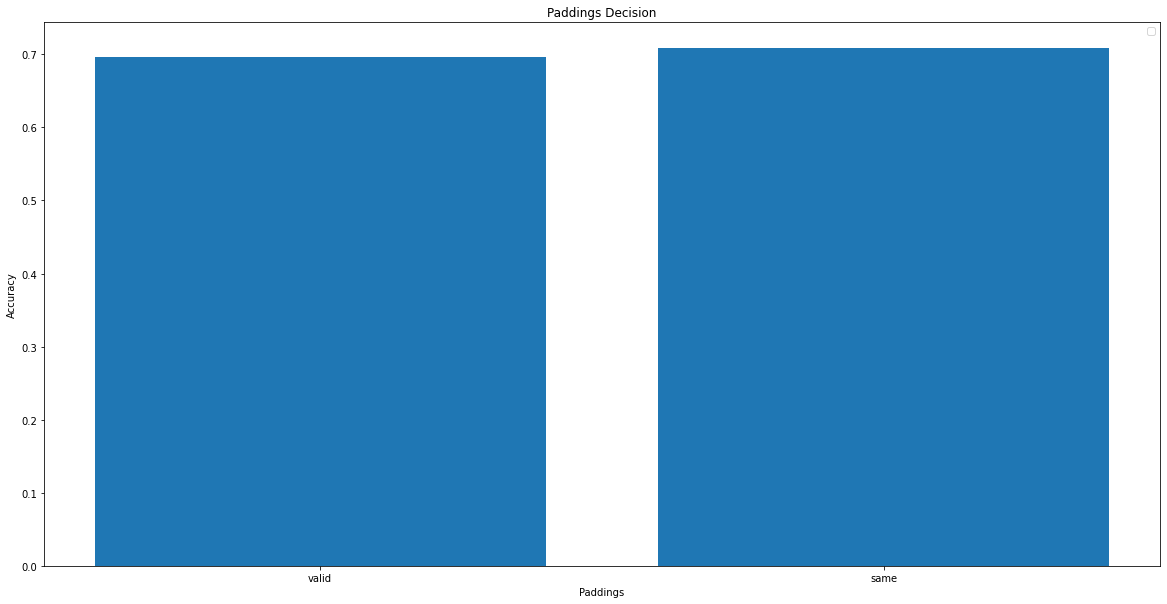

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(paddings, test_acc)
plt.xlabel('Paddings')
plt.ylabel('Accuracy')
plt.title('Paddings Decision')
plt.legend()
plt.show()

Therefore, padding is set to "same" further on.

## Neurons


In [ ]:
neurons = [[32,64,64,64],
           [32,64,128,32],
           [16,32,64,128]]
padding = "same"
initializer = tf.keras.initializers.HeUniform()
batch_size = 50
dropout = 0.1
test_acc=[]
for neuron in neurons:
    print('neuron : ',neuron)
    model = models.Sequential()

    model.add(layers.Conv2D(neuron[0], (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2),padding = padding))


    model.add(layers.Conv2D(neuron[1], (3, 3), activation='relu',kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2),padding = padding))

    model.add(layers.Conv2D(neuron[2], (3, 3), activation='relu',kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2),padding = padding))

    model.add(layers.Flatten())
    model.add(layers.Dense(neuron[3], activation='relu',kernel_initializer = initializer))
    model.add(layers.Dense(10, activation='softmax'))

    # model.summary()

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    hist = model.fit(X_train, y_train, epochs=10,batch_size=batch_size)
    score, accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_acc.append(accuracy)

neuron :  [32, 64, 64, 64]
Epoch 1/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.5190 - accuracy: 0.4420
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1540 - accuracy: 0.5880
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0058 - accuracy: 0.6430
Epoch 4/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.9089 - accuracy: 0.6800
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.8408 - accuracy: 0.7037
Epoch 6/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7821 - accuracy: 0.7263
Epoch 7/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7391 - accuracy: 0.7399
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6985 - accuracy: 0.7539
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6657 - accuracy: 0.7658
Epoch 10/10
1000/1000 [==============================] 

No handles with labels found to put in legend.


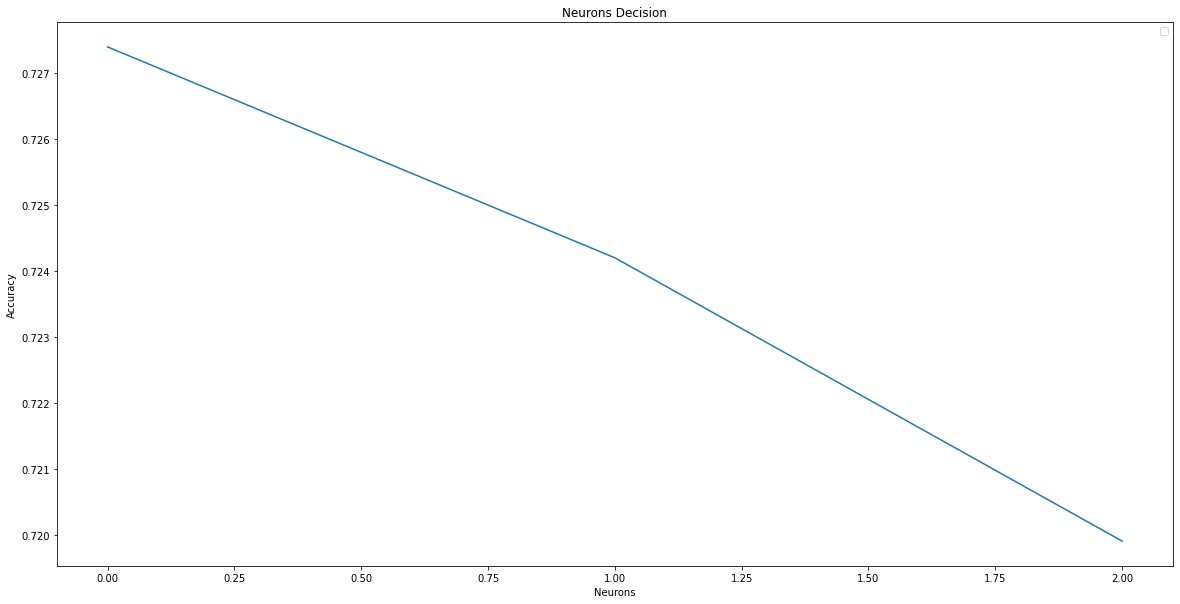

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(test_acc)
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.title('Neurons Decision')
plt.legend()
plt.show()

Therefore, neurons for each layer is set to [32,64,64,64] further on.

## Loss Function Dependency

## Epochs Decision

In [ ]:
epochs=[10,20,50,100]
neuron = [32,64,64,64]
padding = "same"
initializer = tf.keras.initializers.HeUniform()
batch_size = 50
dropout = 0.1
test_acc=[]
for epoch in epochs:
    print('epoch : ',epoch)
    model = models.Sequential()

    model.add(layers.Conv2D(neuron[0], (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2),padding = padding))


    model.add(layers.Conv2D(neuron[1], (3, 3), activation='relu',kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2),padding = padding))

    model.add(layers.Conv2D(neuron[2], (3, 3), activation='relu',kernel_initializer = initializer))
    model.add(Dropout(dropout))
    model.add(layers.MaxPooling2D((2, 2),padding = padding))

    model.add(layers.Flatten())
    model.add(layers.Dense(neuron[3], activation='relu',kernel_initializer = initializer))
    model.add(layers.Dense(10, activation='softmax'))

    # model.summary()

    model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    hist = model.fit(X_train, y_train, epochs=epoch,batch_size=batch_size)
    score, accuracy = model.evaluate(X_test, y_test, verbose=0)
    test_acc.append(accuracy)

epoch :  10
Epoch 1/10
1000/1000 [==============================] - 13s 4ms/step - loss: 1.5218 - accuracy: 0.4460
Epoch 2/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.1650 - accuracy: 0.5834
Epoch 3/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1.0098 - accuracy: 0.6440
Epoch 4/10
1000/1000 [==============================] - 7s 7ms/step - loss: 0.9151 - accuracy: 0.6789
Epoch 5/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.8422 - accuracy: 0.7049
Epoch 6/10
1000/1000 [==============================] - 6s 6ms/step - loss: 0.7874 - accuracy: 0.7249
Epoch 7/10
1000/1000 [==============================] - 5s 5ms/step - loss: 0.7468 - accuracy: 0.7366
Epoch 8/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.7039 - accuracy: 0.7510
Epoch 9/10
1000/1000 [==============================] - 4s 4ms/step - loss: 0.6722 - accuracy: 0.7636
Epoch 10/10
1000/1000 [==============================] - 4s 4ms/step 

No handles with labels found to put in legend.


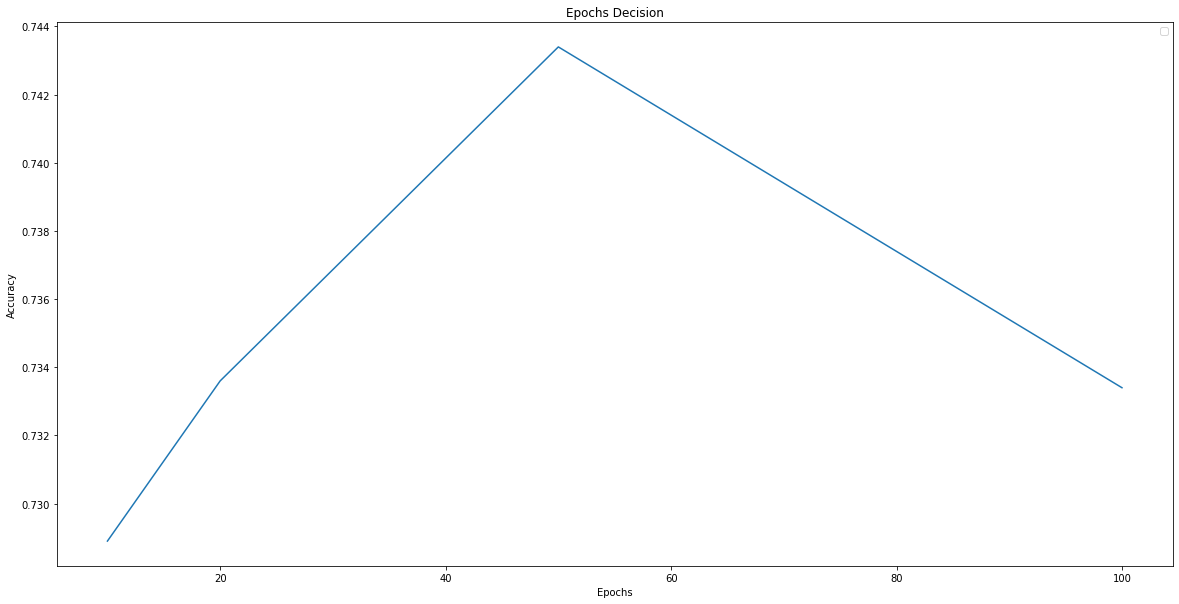

Best Performance :  0.743399977684021


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(epochs, test_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Epochs Decision')
plt.legend()
plt.show()
print('Best Performance : ',max(test_acc))

Therefore the best performance is 74.3 % Accuracy for this model.

# Model Variation

### Model 1

In [5]:
performance = {'model':[],'best_performance':[]}

In [6]:
epoch= 50
neuron = [32,64,64,64]
padding = "same"
initializer = tf.keras.initializers.HeUniform()
batch_size = 50
dropout = 0.1

model = models.Sequential()

model.add(layers.Conv2D(neuron[0], (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(layers.MaxPooling2D((2, 2),padding = padding))


model.add(layers.Conv2D(neuron[1], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Conv2D(neuron[2], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Flatten())
model.add(layers.Dense(neuron[3], activation='relu',kernel_initializer = initializer))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=epoch,batch_size=batch_size)
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
performance['model'].append(hist)
performance['best_performance'].append(accuracy)

Epoch 1/50
1000/1000 [==============================] - 24s 12ms/step - loss: 1.5155 - accuracy: 0.4496
Epoch 2/50
1000/1000 [==============================] - 12s 12ms/step - loss: 1.1408 - accuracy: 0.5927
Epoch 3/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.9988 - accuracy: 0.6477
Epoch 4/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.9077 - accuracy: 0.6824
Epoch 5/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.8378 - accuracy: 0.7078
Epoch 6/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.7845 - accuracy: 0.7258
Epoch 7/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.7397 - accuracy: 0.7404
Epoch 8/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.7038 - accuracy: 0.7540
Epoch 9/50
1000/1000 [==============================] - 12s 12ms/step - loss: 0.6668 - accuracy: 0.7651
Epoch 10/50
1000/1000 [==============================] - 12s 12m

### Model 2 - More convolution layers

- Deciding Number of Neurons 

In [ ]:
epoch = 10
neurons = [[32,64,64,64,128,128,32],
           [32,32,64,64,128,256,256],
           [32,64,128,256,256,256,512],
           [64,64,128,128,256,256,512],
           [64,64,128,128,256,256,32]]
padding = "same"
initializer = tf.keras.initializers.HeUniform()
batch_size = 50
dropout = 0.1
outputs=[]
for neuron in neurons:
  print('neuron : ', neuron)
  model = models.Sequential()

  model.add(layers.Conv2D(neuron[0], (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
  model.add(layers.Conv2D(neuron[1], (3, 3), activation='relu',kernel_initializer = initializer))
  model.add(Dropout(dropout))
  model.add(layers.MaxPooling2D((2, 2),padding = padding))

  model.add(layers.Conv2D(neuron[2], (3, 3), activation='relu',kernel_initializer = initializer))
  model.add(layers.Conv2D(neuron[3], (3, 3), activation='relu',kernel_initializer = initializer))
  model.add(Dropout(dropout))
  model.add(layers.MaxPooling2D((2, 2),padding = padding))

  model.add(layers.Conv2D(neuron[4], (3, 3), activation='relu',kernel_initializer = initializer))
  model.add(layers.Conv2D(neuron[5], (3, 3), activation='relu',kernel_initializer = initializer))
  model.add(Dropout(dropout))
  model.add(layers.MaxPooling2D((2, 2),padding = padding))

  model.add(layers.Flatten())
  model.add(layers.Dense(neuron[6], activation='relu',kernel_initializer = initializer))
  model.add(layers.Dense(10, activation='softmax'))

  model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

  hist = model.fit(X_train, y_train, epochs=epoch,batch_size=batch_size)
  score, accuracy = model.evaluate(X_test, y_test, verbose=0)
  outputs.append(accuracy)

No handles with labels found to put in legend.


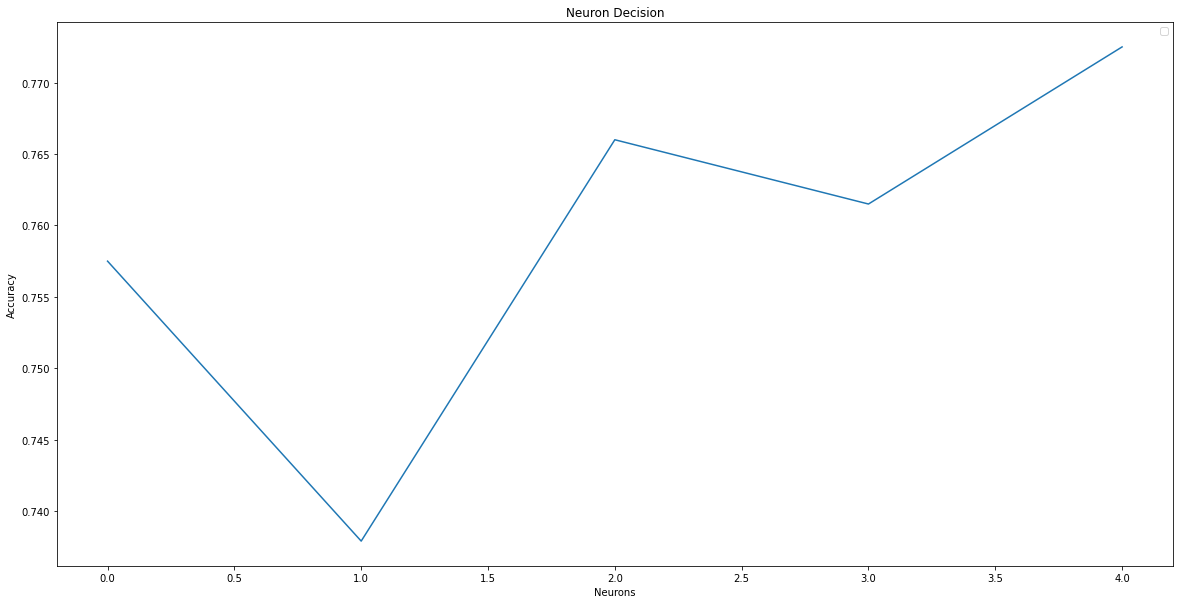

Best Performance :  0.7724999785423279


In [ ]:
plt.figure(figsize=(20,10))
plt.plot(outputs)
plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.title('Neuron Decision')
plt.legend()
plt.show()
print('Best Performance : ',max(outputs))

Neurons [] are used for model comparison

- Adding Model for comparison

In [7]:
epoch = 50
neuron = [64,64,128,128,256,256,32]
padding = "same"
initializer = tf.keras.initializers.HeUniform()
batch_size = 50
dropout = 0.1

model = models.Sequential()

model.add(layers.Conv2D(neuron[0], (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[1], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Conv2D(neuron[2], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[3], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Conv2D(neuron[4], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[5], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Flatten())
model.add(layers.Dense(neuron[6], activation='relu',kernel_initializer = initializer))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=epoch,batch_size=batch_size)
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
performance['model'].append(hist)
performance['best_performance'].append(accuracy)

Epoch 1/50
1000/1000 [==============================] - 24s 23ms/step - loss: 1.5602 - accuracy: 0.4275
Epoch 2/50
1000/1000 [==============================] - 23s 23ms/step - loss: 1.0025 - accuracy: 0.6461
Epoch 3/50
1000/1000 [==============================] - 23s 23ms/step - loss: 0.7744 - accuracy: 0.7294
Epoch 4/50
1000/1000 [==============================] - 29s 29ms/step - loss: 0.6477 - accuracy: 0.7732
Epoch 5/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.5393 - accuracy: 0.8116
Epoch 6/50
1000/1000 [==============================] - 23s 23ms/step - loss: 0.4518 - accuracy: 0.8422
Epoch 7/50
1000/1000 [==============================] - 23s 23ms/step - loss: 0.3803 - accuracy: 0.8648
Epoch 8/50
1000/1000 [==============================] - 23s 23ms/step - loss: 0.3254 - accuracy: 0.8865
Epoch 9/50
1000/1000 [==============================] - 23s 23ms/step - loss: 0.2757 - accuracy: 0.9031
Epoch 10/50
1000/1000 [==============================] - 24s 24m

### Model 3 - Batch Normalization


In [8]:
neuron= [64,64,128,128,256,256,32]
epoch = 50
padding = "same"
initializer = tf.keras.initializers.HeUniform()
batch_size = 50
dropout = 0.1

model = models.Sequential()

model.add(layers.Conv2D(neuron[0], (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[1], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Conv2D(neuron[2], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[3], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Conv2D(neuron[4], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[5], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Flatten())
model.add(layers.Dense(neuron[6], activation='relu',kernel_initializer = initializer))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=epoch,batch_size=batch_size)
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
performance['model'].append(hist)
performance['best_performance'].append(accuracy)

Epoch 1/50
1000/1000 [==============================] - 25s 25ms/step - loss: 1.3985 - accuracy: 0.4996
Epoch 2/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.9054 - accuracy: 0.6827
Epoch 3/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.7070 - accuracy: 0.7520
Epoch 4/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.5775 - accuracy: 0.7980
Epoch 5/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.4778 - accuracy: 0.8363
Epoch 6/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.3886 - accuracy: 0.8666
Epoch 7/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.3180 - accuracy: 0.8896
Epoch 8/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.2589 - accuracy: 0.9098
Epoch 9/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.2103 - accuracy: 0.9268
Epoch 10/50
1000/1000 [==============================] - 25s 25m

### Model 4 - Batch Normalization & Dropout Order Changed

In [9]:
neuron= [64,64,128,128,256,256,32]
epoch = 50
padding = "same"
initializer = tf.keras.initializers.HeUniform()
batch_size = 50
dropout = 0.1

model = models.Sequential()

model.add(layers.Conv2D(neuron[0], (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[1], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Conv2D(neuron[2], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[3], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Conv2D(neuron[4], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[5], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(BatchNormalization())
model.add(Dropout(dropout))
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Flatten())
model.add(layers.Dense(neuron[6], activation='relu',kernel_initializer = initializer))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=epoch,batch_size=batch_size)
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
performance['model'].append(hist)
performance['best_performance'].append(accuracy)

Epoch 1/50
1000/1000 [==============================] - 25s 25ms/step - loss: 1.3762 - accuracy: 0.5035
Epoch 2/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.8975 - accuracy: 0.6853
Epoch 3/50
1000/1000 [==============================] - 24s 24ms/step - loss: 0.7050 - accuracy: 0.7546
Epoch 4/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.5888 - accuracy: 0.7954
Epoch 5/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.4816 - accuracy: 0.8297
Epoch 6/50
1000/1000 [==============================] - 25s 25ms/step - loss: 0.3984 - accuracy: 0.8624
Epoch 7/50
1000/1000 [==============================] - 24s 24ms/step - loss: 0.3278 - accuracy: 0.8841
Epoch 8/50
1000/1000 [==============================] - 24s 24ms/step - loss: 0.2700 - accuracy: 0.9058
Epoch 9/50
1000/1000 [==============================] - 26s 26ms/step - loss: 0.2206 - accuracy: 0.9225
Epoch 10/50
1000/1000 [==============================] - 27s 27m

### Model 5 - Batch normalization added on model 1

In [10]:
epoch= 50
neuron = [32,64,64,64]
padding = "same"
initializer = tf.keras.initializers.HeUniform()
batch_size = 50
dropout = 0.1

model = models.Sequential()

model.add(layers.Conv2D(neuron[0], (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding = padding))


model.add(layers.Conv2D(neuron[1], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Conv2D(neuron[2], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Flatten())
model.add(layers.Dense(neuron[3], activation='relu',kernel_initializer = initializer))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=epoch,batch_size=batch_size)
score, accuracy = model.evaluate(X_test, y_test, verbose=0)
performance['model'].append(hist)
performance['best_performance'].append(accuracy)

Epoch 1/50
1000/1000 [==============================] - 13s 12ms/step - loss: 1.3227 - accuracy: 0.5274
Epoch 2/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.9641 - accuracy: 0.6589
Epoch 3/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.8239 - accuracy: 0.7131
Epoch 4/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.7387 - accuracy: 0.7427
Epoch 5/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.6680 - accuracy: 0.7658
Epoch 6/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.6197 - accuracy: 0.7820
Epoch 7/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.5742 - accuracy: 0.7964
Epoch 8/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.5361 - accuracy: 0.8100
Epoch 9/50
1000/1000 [==============================] - 13s 13ms/step - loss: 0.4989 - accuracy: 0.8230
Epoch 10/50
1000/1000 [==============================] - 13s 13m

### Model Decision

No handles with labels found to put in legend.


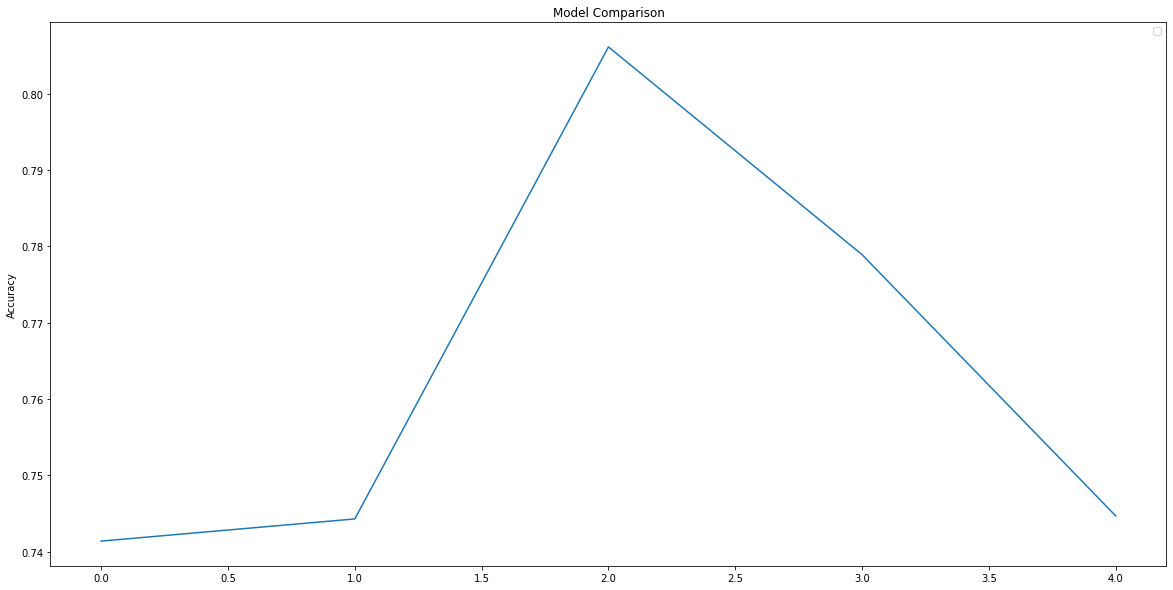

Best Performance :  0.8061000108718872


In [11]:
plt.figure(figsize=(20,10))
plt.plot(performance['best_performance'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.legend()
plt.show()
print('Best Performance : ',max(performance['best_performance']))

Model 3 performs best(Test Accuracy : 80.6%)

#### Training & Test Accuracy Comparison of Model 3

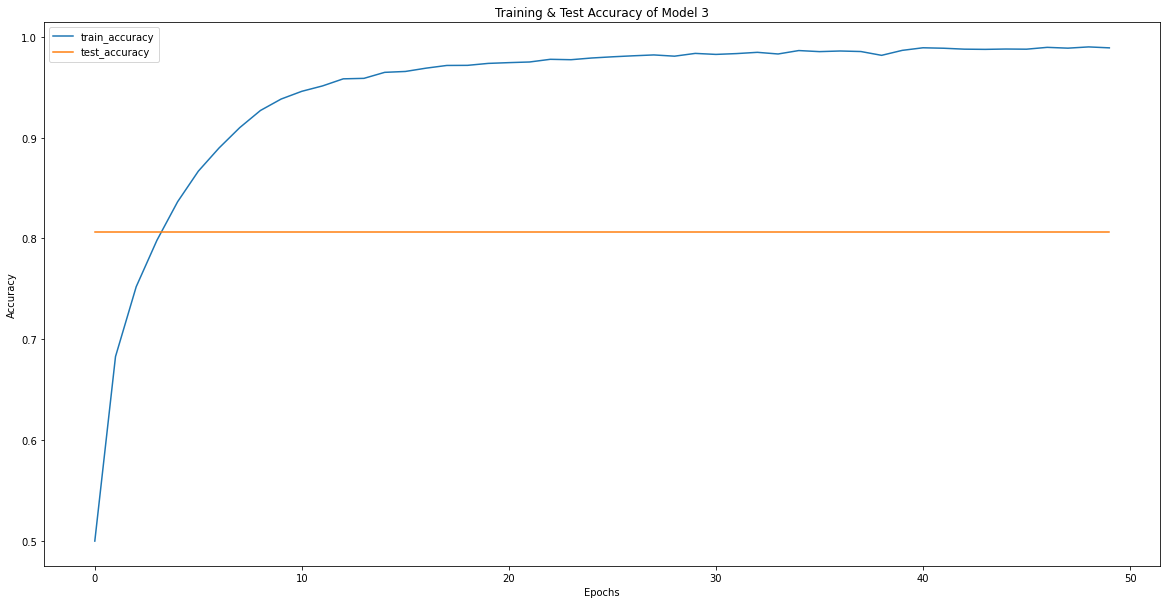

In [20]:
plt.figure(figsize=(20,10))
plt.plot(performance['model'][2].history['accuracy'],label = 'train_accuracy')
plt.plot([performance['best_performance'][2]]*50, label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Test Accuracy of Model 3')
plt.legend()
plt.show()

# Validation Set Applied to the Best Model
 - Applying Validation Set for Model 3

In [21]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size = 0.2)

X_train = X_train.reshape((40000, 32, 32, 3,1))
X_val = X_val.reshape((10000, 32, 32, 3,1))
X_test = X_test.reshape((10000, 32, 32, 3,1))
X_train , X_val, X_test = X_train/255, X_val/255, X_test/255

In [23]:
neuron= [64,64,128,128,256,256,32]
epoch = 50
padding = "same"
initializer = tf.keras.initializers.HeUniform()
batch_size = 50
dropout = 0.1

model = models.Sequential()

model.add(layers.Conv2D(neuron[0], (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[1], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Conv2D(neuron[2], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[3], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Conv2D(neuron[4], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(layers.Conv2D(neuron[5], (3, 3), activation='relu',kernel_initializer = initializer))
model.add(Dropout(dropout))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2),padding = padding))

model.add(layers.Flatten())
model.add(layers.Dense(neuron[6], activation='relu',kernel_initializer = initializer))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=epoch,batch_size=batch_size, validation_data = (X_val, y_val))
score, accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
800/800 [==============================] - 23s 28ms/step - loss: 1.4918 - accuracy: 0.4618 - val_loss: 1.6913 - val_accuracy: 0.4311
Epoch 2/50
800/800 [==============================] - 23s 29ms/step - loss: 1.0389 - accuracy: 0.6336 - val_loss: 1.3557 - val_accuracy: 0.5537
Epoch 3/50
800/800 [==============================] - 23s 29ms/step - loss: 0.8188 - accuracy: 0.7143 - val_loss: 0.9408 - val_accuracy: 0.6801
Epoch 4/50
800/800 [==============================] - 24s 30ms/step - loss: 0.6743 - accuracy: 0.7650 - val_loss: 0.8521 - val_accuracy: 0.7071
Epoch 5/50
800/800 [==============================] - 24s 30ms/step - loss: 0.5622 - accuracy: 0.8053 - val_loss: 0.8395 - val_accuracy: 0.7245
Epoch 6/50
800/800 [==============================] - 22s 28ms/step - loss: 0.4706 - accuracy: 0.8352 - val_loss: 0.7272 - val_accuracy: 0.7604
Epoch 7/50
800/800 [==============================] - 22s 28ms/step - loss: 0.3798 - accuracy: 0.8674 - val_loss: 0.7798 - val_accuracy:

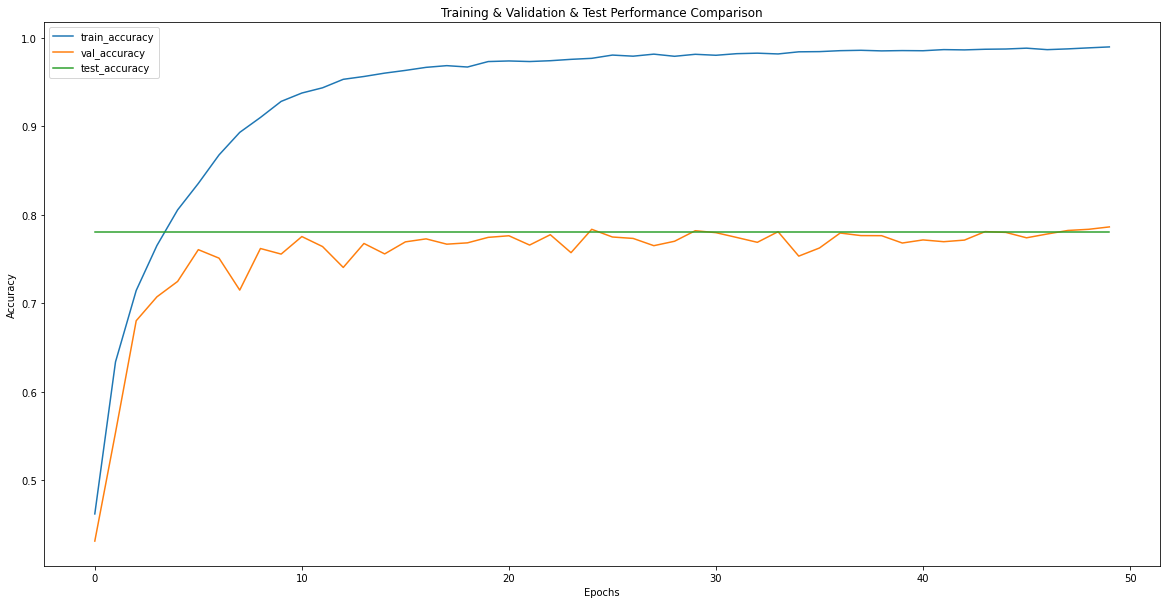

Best Performance: 0.7807000279426575


In [28]:
plt.figure(figsize=(20,10))
plt.plot(hist.history['accuracy'],label = 'train_accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.plot([accuracy]*50, label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation & Test Performance Comparison')
plt.legend()
plt.show()
print('Best Performance:',accuracy)

># Conclusion
First a simple CNN model was improved by adjusting parameters based on test set performance. Then, other models variated from the first model was introduced and performances of each models were compared. For the best model, validation set was set apart from the training set(size of 0.2). Then the test performance of the model containing validation set and those not containining validation set were compared. As a result, the model trained without validation set performed 80.6% on the test set. The model trained with validation set performed 78.1% on the test set. Therefore, in this case, the amount of training dataset affects the performance more than the parameter adjustment using the validation set.
